<a href="https://colab.research.google.com/github/shuklahrs/Machine-Learning-Models-/blob/Car_Price_Prediction/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAR PRICE PRIDICTION(Linear Regression and Lasso)**

#Importing Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Importing Dataset

In [37]:
car_dataset = pd.read_csv('car data.csv')

In [38]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Check number of rows and columns dataset have

In [39]:
car_dataset.shape

(301, 9)

Info. about dataset

In [40]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking missing values

In [41]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Distribution of categorical data

In [42]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#Encoding Categorical Data

In [43]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [44]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#Splitting the data and Target

In [45]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis= 1)
Y = car_dataset['Selling_Price']

In [46]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [47]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#Splitting the Dataset into Training set and Test set 

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

#Training the model 

1. **Linear Regression**

In [49]:
lnr_mdl = LinearRegression()
lnr_mdl.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Pridicting the Training Data

In [50]:
y_pred = lnr_mdl.predict(X_train)

R2 Squared Error

In [51]:
error = metrics.r2_score(Y_train, y_pred)
print('R2 squared error =',error)

R2 squared error = 0.8799451660493711


Predicting the Test Data

In [52]:
x_pred = lnr_mdl.predict(X_test)

R2 Squared Error

In [53]:
error_test = metrics.r2_score(Y_test, x_pred)
print('R2 Squared Error=', error_test)

R2 Squared Error= 0.8365766715027051


**Visualising the Dataset**

1. Training Data

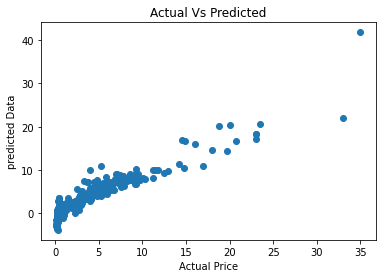

In [54]:
plt.scatter(Y_train, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('predicted Data')
plt.title('Actual Vs Predicted')
plt.show()

2. Test Data

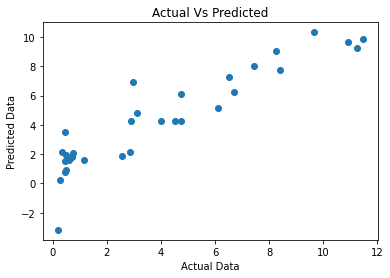

In [55]:
plt.scatter(Y_test, x_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Vs Predicted')
plt.show()

2. **Lasso**

In [56]:
lnr_mdl = Lasso()
lnr_mdl.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Pridicting the Training Data

In [57]:
y_pred = lnr_mdl.predict(X_train)

R2 Squared Error

In [58]:
error = metrics.r2_score(Y_train, y_pred)
print('R2 squared error =',error)

R2 squared error = 0.8427856123435794


Predicting the Test Data

In [59]:
x_pred = lnr_mdl.predict(X_test)

R2 Squared Error

In [60]:
error_test = metrics.r2_score(Y_test, x_pred)
print('R2 Squared Error=', error_test)

R2 Squared Error= 0.8709167941173195


**Visualising the Dataset**

1. Training Data

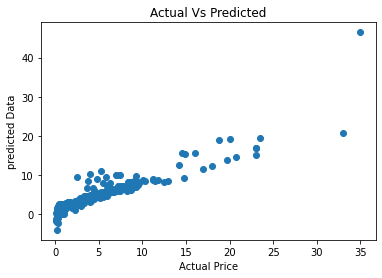

In [61]:
plt.scatter(Y_train, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('predicted Data')
plt.title('Actual Vs Predicted')
plt.show()

2. Test Data

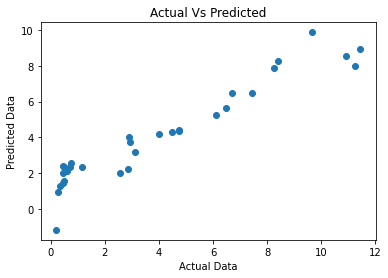

In [62]:
plt.scatter(Y_test, x_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Vs Predicted')
plt.show()